## **COMP4082 - Autonomous Robotic Systems**
---

**Student Name:** Anshali Manoharan

**Student ID:** 20506330

---

### Research Question 2:
**How does injecting pink noise into continuous input space affect convergence performance in the GA with Multi-step Mutation (GA-MSM) and in (GA-MSM-P)?**

#### Experiment Design:
- Pink noise is uniformly injected into the continuous input space.
- The noise scale, controlled by parameter σ, is a critical hyperparameter.
- Experiments are conducted with noise scales: [0.1, 0.5, 1].

#### Steps:
1. Run GA-MSM with pink noise injection (σ = 0.1, 0.5, 1):
   - Perform **5 runs** for each σ value.
2. Run GA-MSM without pink noise injection:
   - Perform **5 runs**.
3. Repeat set-up for GA-MSM-P

_The tuning of the sigma (𝜎) value for the noise was performed manually rather than automated tuning. This decision was made to avoid the risk of kernel deallocation during extended runtime._


#### Summary of Findings:

**General Robustness to Noise:** The algorithm's performance without pink noise injection and with low-scale pink noise ( 𝜎 = 0.1) shows near-identical convergence patterns, both in terms of speed and final population fitness. This demonstrates that GA-MSM generalizes well to low levels of pink noise, as such perturbations do not disrupt the optimization process and may slightly aid in early exploration.

**Impact of Higher Noise Levels ( 𝜎 = 0.5 and σ=1.0):** For higher noise levels ( 𝜎 = 0.5 and 𝜎 = 1.0), convergence slows significantly, and the population achieves much lower fitness values. This indicates that excessive noise hampers the algorithm's ability to evaluate and propagate fitter individuals, likely disrupting its convergence and leading to suboptimal solutions.

**Exploration vs. Convergence Trade-off:** While higher levels of pink noise encourage greater exploration, they compromise the exploitation phase critical for achieving high fitness. In contrast, low noise levels ( 𝜎 = 0.1) strike a balance by maintaining exploration without impeding convergence.

In conclusion, injecting pink noise into the continuous input space affects the convergence of GA-MSM and GA-MSM-P depending on the noise scale. Low-scale pink noise (σ=0.1) has negligible impact on convergence time and fitness, demonstrating robustness to minor perturbations. Conversely, higher noise levels ( σ=0.5 and σ=1.0) slow convergence and degrade population fitness, indicating that excessive noise disrupts the optimization process.

_NOTE: In outputs, sometimes Deprecation Warnings appear since v0 of the CartPole environment is used. However, this poses no error to the experiments performed._


#### Part 1: Install all necessary dependencies
- This part installs the necessary Python libraries: `gymnasium`, `tensorflow`, `colorednoise`, `matplotlib`, `numpy`, and `uuid`.
- The `os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'` suppresses TensorFlow logs for CPU optimization messages to reduce unnecessary output.



In [1]:
!pip install gymnasium tensorflow colorednoise matplotlib numpy uuid prettytable pandas openpyxl

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: cm-create-image master has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of cm-create-image or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 22.0.4 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
import os

# The code execution occurred on a CPU.
# As a result, TensorFlow logs related to optimizations for CPU architecture
# (e.g., AVX2, FMA) were suppressed.

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

#### Part 2. All necessary imports
- Imports standard libraries such as `numpy`, `random`, and `matplotlib` for numerical computations, random processes, and plotting.
- Imports TensorFlow's `keras` submodules for deep learning functionalities.
- `gymnasium` is imported to work with reinforcement learning environments.
- Additional modules like `colorednoise`, `joblib`, `uuid`, `time` and `prettytable` are included for noise generation, parallel processing, unique ID creation for the models created during parallel processing, time-related operations and data visualisation.
- Custom modules (`populationGenerator`, `crossOverOperator`, `fitnessOperators`, `GAMSM`, and `graphResults`) are imported for the genetic algorithm (GA-MSM) and related operations.


In [3]:
import numpy as np
import random
from tensorflow.keras import layers, models
import gymnasium as gym
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import random
import copy
import colorednoise as cn
import tensorflow as tf
import time
import uuid
from prettytable import PrettyTable

from population_generator import populationGenerator
from crossover_operator import crossOverOperator
from fitness_operators import fitnessOperators
from graph_results import graphResults

#### Part 3. Setting hyperparameters
- Defines hyperparameters used by the GA-MSM algorithm:
  - `number_of_additional_mutations`: Specifies how many additional mutations occur per generation, based on the Core Paper A.
  - `population_number`: Total population size for the genetic algorithm.
  - `elite_percentage`: Top percentage of the population to be considered elite, based on Core Paper A
  - `noise_type`: Gaussian noise, the default noise type is used as mutation operator.
  - `number_of_generations`: The number of generations for the algorithm to run, with 100 chosen from convergence trends observed previously.
  - `number_of_runs`: The total number of times the algorithm should be run when a different configuration is implemented.
  - `pink_injection`: Boolean value for flagging whether pink injection should be used in the input space
  - `inject_factor`: intensity of the pink injection (scale) - between 0 and 1.

#### Part 4. GA-MSM (with Pink Noise Injection into Input Space with σ = 1.0)

- This part executes the GA-MSM algorithm by creating an instance of the `GAMSM` class with the specified hyperparameters: the number of additional mutations, population size, elite percentage, noise type, and the number of generations.

In [4]:
number_of_additional_mutations = 10
population_number = 100
elite_percentage = 0.1
number_of_generations = 100
number_of_runs = 5
noise_type = 'gaussian' # this is the default mutation operator noise
pink_injection = True
inject_factor = 1 # if pink_injection set to True, used to set scale (σ) of injection

In [5]:
from GA_MSM_algorithm2 import GAMSM2

all_run_data1 = []

start_time = time.time()

# 5 runs are performed
for i in range(number_of_runs):

    print("Run Number: ", i+1)
    GAMSM_pink = GAMSM2(number_of_additional_mutations, population_number, elite_percentage, noise_type, number_of_generations, 1, pink_injection, inject_factor)
    GAMSM_pink.run() # results stores average of each generation - 200 average scores stored
    all_run_data1.append(GAMSM_pink.average_population_fitness)

end_time = time.time()

total_time = end_time - start_time
hours, minutes = divmod(total_time // 60, 60)
print(f"\nOverall Runtime: {int(hours)} hours and {int(minutes)} minutes.")

Run Number:  1
Total Runtime: 0 hours and 6 minutes.
Run Number:  2
Total Runtime: 0 hours and 6 minutes.
Run Number:  3
Total Runtime: 0 hours and 6 minutes.
Run Number:  4
Total Runtime: 0 hours and 6 minutes.
Run Number:  5
Total Runtime: 0 hours and 5 minutes.

Overall Runtime: 0 hours and 31 minutes.


#### Part 5. Saving Results

In [6]:
import pandas as pd

df1 = pd.DataFrame(all_run_data1)

with pd.ExcelWriter('scale1GAMSM.xlsx', engine='openpyxl') as writer:
    df1.to_excel(writer, sheet_name='Sheet1', index=False, header=False)

print("Excel file 'scale1GAMSM.xlsx' created successfully.")

Excel file 'scale1GAMSM.xlsx' created successfully.


#### Part 6. GA-MSM (with Pink Noise Injection into Input Space with σ = 0.5)

In [14]:
number_of_additional_mutations = 10
population_number = 100
elite_percentage = 0.1
number_of_generations = 100
number_of_runs = 5
noise_type = 'gaussian' # this is the mutation operator noise
pink_injection = True
inject_factor = 0.5 # if pink_injection set to True, this is used to set scale (σ) of injection

In [15]:
from GA_MSM_algorithm2 import GAMSM2

all_run_data2 = []

start_time = time.time()

# 5 runs are performed
for i in range(number_of_runs):

    print("Run Number: ", i+1)
    GAMSM_pink = GAMSM2(number_of_additional_mutations, population_number, elite_percentage, noise_type, number_of_generations, 1, pink_injection, inject_factor)
    GAMSM_pink.run() # results stores average of each generation - 100 average scores stored
    all_run_data2.append(GAMSM_pink.average_population_fitness)

end_time = time.time()

total_time = end_time - start_time
hours, minutes = divmod(total_time // 60, 60)
print(f"\nOverall Runtime: {int(hours)} hours and {int(minutes)} minutes.")

Run Number:  1
Total Runtime: 0 hours and 8 minutes.
Run Number:  2
Total Runtime: 0 hours and 9 minutes.
Run Number:  3
Total Runtime: 0 hours and 9 minutes.
Run Number:  4
Total Runtime: 0 hours and 9 minutes.
Run Number:  5
Total Runtime: 0 hours and 8 minutes.

Overall Runtime: 0 hours and 46 minutes.


#### Part 7. Saving Results

In [16]:
import pandas as pd

df2 = pd.DataFrame(all_run_data2)

with pd.ExcelWriter('scale2GAMSM.xlsx', engine='openpyxl') as writer:
    df2.to_excel(writer, sheet_name='Sheet1', index=False, header=False)

print("Excel file 'scale2GAMSM.xlsx' created successfully.")

Excel file 'scale2GAMSM.xlsx' created successfully.


#### Part 8. GA-MSM (with Pink Noise Injection into Input Space with σ = 0.1)

In [17]:
number_of_additional_mutations = 10
population_number = 100
elite_percentage = 0.1
number_of_generations = 100
number_of_runs = 5
noise_type = 'gaussian' # this is the mutation operator noise
pink_injection = True
inject_factor = 0.1 # if pink_injection set to True, this is used to set scale (σ) of injection

In [19]:
from GA_MSM_algorithm2 import GAMSM2

all_run_data3 = []

start_time = time.time()

# 5 runs are performed
for i in range(number_of_runs):

    print("Run Number: ", i+1)
    GAMSM_pink = GAMSM2(number_of_additional_mutations, population_number, elite_percentage, noise_type, number_of_generations, 1, pink_injection, inject_factor)
    GAMSM_pink.run() # results stores average of each generation - 100 average scores stored
    all_run_data3.append(GAMSM_pink.average_population_fitness)

end_time = time.time()

total_time = end_time - start_time
hours, minutes = divmod(total_time // 60, 60)
print(f"\nOverall Runtime: {int(hours)} hours and {int(minutes)} minutes.")

Run Number:  1
Total Runtime: 0 hours and 22 minutes.
Run Number:  2
Total Runtime: 0 hours and 20 minutes.
Run Number:  3
Total Runtime: 0 hours and 23 minutes.
Run Number:  4
Total Runtime: 0 hours and 22 minutes.
Run Number:  5
Total Runtime: 0 hours and 19 minutes.

Overall Runtime: 1 hours and 48 minutes.


/home/hcyam5/.local/lib/python3.7/site-packages/gymnasium/envs/registration.py:524: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  f"The environment {env_name} is out of date. You should consider "
/home/hcyam5/.local/lib/python3.7/site-packages/gymnasium/envs/registration.py:524: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  f"The environment {env_name} is out of date. You should consider "
/home/hcyam5/.local/lib/python3.7/site-packages/gymnasium/envs/registration.py:524: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  f"The environment {env_name} is out of date. You should consider "
/home/hcyam5/.local/lib/python3.7/site-packages/gymnasium/envs/registration.py:524: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to ver

#### Part 9. Saving Results

In [20]:
import pandas as pd

df3 = pd.DataFrame(all_run_data3)

with pd.ExcelWriter('scale3GAMSM.xlsx', engine='openpyxl') as writer:
    df3.to_excel(writer, sheet_name='Sheet1', index=False, header=False)

print("Excel file 'scale3GAMSM.xlsx' created successfully.")

Excel file 'scale3GAMSM.xlsx' created successfully.


#### Part 10. GA-MSM (without Pink Noise Injection into Input Space)

In [21]:
number_of_additional_mutations = 10
population_number = 100
elite_percentage = 0.1
number_of_generations = 100 # it was noticeable that the algorithm converged before 100 generations, therefore to reduce computational resources and time taken, the number of generations was set to 100.
number_of_runs = 5
noise_type = 'gaussian' # this is the mutation operator noise
pink_injection = False
inject_factor = None # if pink_injection set to True, this is used to set scale (σ) of injection

In [22]:
from GA_MSM_algorithm2 import GAMSM2

all_run_data4 = []

start_time = time.time()

# 5 runs are performed
for i in range(number_of_runs):

    print("Run Number: ", i+1)
    GAMSM_pink = GAMSM2(number_of_additional_mutations, population_number, elite_percentage, noise_type, number_of_generations, 1, pink_injection, inject_factor)
    GAMSM_pink.run() # results stores average of each generation - 200 average scores stored
    all_run_data4.append(GAMSM_pink.average_population_fitness)

end_time = time.time()

total_time = end_time - start_time
hours, minutes = divmod(total_time // 60, 60)
print(f"\nOverall Runtime: {int(hours)} hours and {int(minutes)} minutes.")

Run Number:  1
Total Runtime: 0 hours and 17 minutes.
Run Number:  2
Total Runtime: 0 hours and 20 minutes.
Run Number:  3
Total Runtime: 0 hours and 20 minutes.
Run Number:  4
Total Runtime: 0 hours and 19 minutes.
Run Number:  5
Total Runtime: 0 hours and 15 minutes.

Overall Runtime: 1 hours and 34 minutes.


#### Part 11. Saving Results

In [23]:
import pandas as pd

df4 = pd.DataFrame(all_run_data4)

with pd.ExcelWriter('scale0GAMSM.xlsx', engine='openpyxl') as writer:
    df4.to_excel(writer, sheet_name='Sheet1', index=False, header=False)

print("Excel file 'scale0GAMSM.xlsx' created successfully.")

Excel file 'scale0GAMSM.xlsx' created successfully.


#### Part 12. Extracting Results

In [27]:
# calculating medians

import pandas as pd

df1 = pd.read_excel("scale1GAMSM.xlsx", sheet_name='Sheet1', header=None)
df2 = pd.read_excel("scale2GAMSM.xlsx", sheet_name='Sheet1', header=None)
df3 = pd.read_excel("scale3GAMSM.xlsx", sheet_name='Sheet1', header=None)
df4 = pd.read_excel("scale0GAMSM.xlsx", sheet_name='Sheet1', header=None)

all_run_data1 = df1.values.tolist()
all_run_data2 = df2.values.tolist()
all_run_data3 = df3.values.tolist()
all_run_data4 = df4.values.tolist()

median_array = []
final_data1 = []
final_data2 = []
final_data3 = []
final_data4 = []

for gen in range(number_of_generations):
    for run_number in range(number_of_runs):
         median_array.append(all_run_data1[run_number][gen])
    final_data1.append(np.median(median_array))
    median_array = []

median_array = []

for gen in range(number_of_generations):
    for run_number in range(number_of_runs):
         median_array.append(all_run_data2[run_number][gen])
    final_data2.append(np.median(median_array))
    median_array = []

median_array = []

for gen in range(number_of_generations):
    for run_number in range(number_of_runs):
         median_array.append(all_run_data3[run_number][gen])
    final_data3.append(np.median(median_array))
    median_array = []

median_array = []

for gen in range(number_of_generations):
    for run_number in range(number_of_runs):
         median_array.append(all_run_data4[run_number][gen])
    final_data4.append(np.median(median_array))
    median_array = []

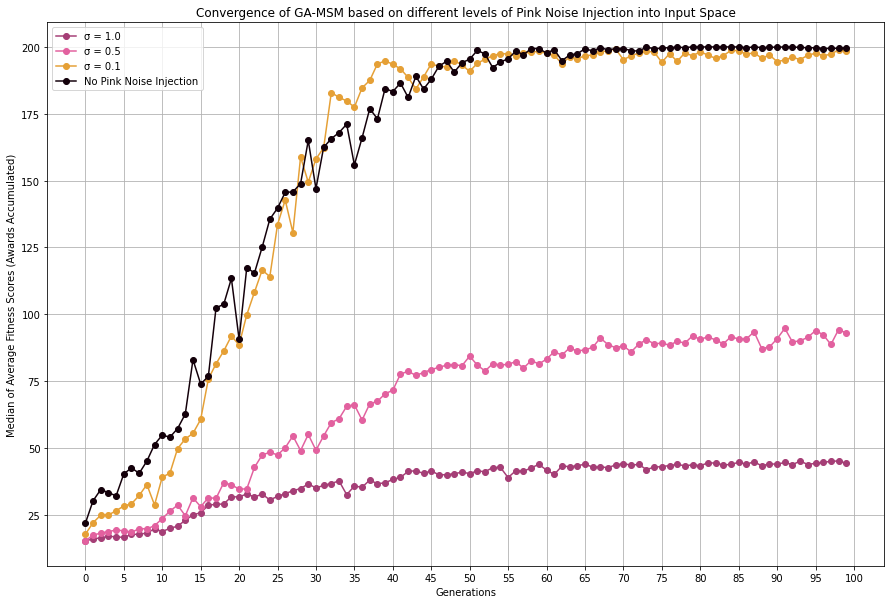

In [28]:
graphResults.display_four_results(100, 'Generations', 'Median of Average Fitness Scores (Awards Accumulated)', 'Convergence of GA-MSM based on different levels of Pink Noise Injection into Input Space', final_data1[:100], final_data2[:100], final_data3[:100], final_data4, "o")

In [33]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Generation", "No Pink Injection", "scale = 0.1", "scale = 0.5", "scale = 1.0"]
for i in range(100):
    row = [
        i + 1, 
        f"{final_data4[i]:.2f}", 
        f"{final_data3[i]:.2f}", 
        f"{final_data2[i]:.2f}", 
        f"{final_data1[i]:.2f}"
    ]
    table.add_row(row)
print(table)


+------------+-------------------+-------------+-------------+-------------+
| Generation | No Pink Injection | scale = 0.1 | scale = 0.5 | scale = 1.0 |
+------------+-------------------+-------------+-------------+-------------+
|     1      |       21.84       |    17.72    |    15.25    |    15.16    |
|     2      |       30.23       |    22.02    |    17.36    |    16.02    |
|     3      |       34.42       |    24.86    |    18.17    |    16.33    |
|     4      |       33.29       |    24.93    |    18.70    |    16.93    |
|     5      |       32.09       |    26.51    |    19.30    |    16.76    |
|     6      |       40.29       |    28.29    |    18.98    |    16.52    |
|     7      |       42.54       |    29.10    |    18.39    |    17.71    |
|     8      |       40.51       |    32.22    |    19.86    |    17.70    |
|     9      |       45.07       |    36.28    |    19.69    |    18.17    |
|     10     |       51.28       |    28.67    |    20.95    |    19.75    |

#### GA-MSM-P with Pink Noise Injection (σ = 1.0)

In [4]:
number_of_additional_mutations = 10
population_number = 100
elite_percentage = 0.1
number_of_generations = 100 # it was noticeable that the algorithm converged before 100 generations, therefore to reduce computational resources and time taken, the number of generations was set to 100.
number_of_runs = 5
noise_type = 'gaussian' # this is the mutation operator noise
pink_injection = True
inject_factor = 1.0 # if pink_injection set to True, this is used to set scale (σ) of injection

In [7]:
from GA_MSM_P_algorithm2 import GAMSM_P2

all_run_data1 = []

start_time = time.time()

# 5 runs are performed
for i in range(number_of_runs):

    print("Run Number: ", i+1)
    GAMSMP_pink = GAMSM_P2(number_of_additional_mutations, population_number, elite_percentage, noise_type, number_of_generations, 1, pink_injection, inject_factor)
    GAMSMP_pink.run()
    all_run_data1.append(GAMSMP_pink.average_population_fitness)

end_time = time.time()

total_time = end_time - start_time
hours, minutes = divmod(total_time // 60, 60)
print(f"\nOverall Runtime: {int(hours)} hours and {int(minutes)} minutes.")

Run Number:  1
Total Runtime: 0 hours and 7 minutes.
Run Number:  2
Total Runtime: 0 hours and 6 minutes.
Run Number:  3
Total Runtime: 0 hours and 6 minutes.
Run Number:  4
Total Runtime: 0 hours and 7 minutes.
Run Number:  5
Total Runtime: 0 hours and 7 minutes.

Overall Runtime: 0 hours and 35 minutes.


#### Saving Results

In [8]:
import pandas as pd

df1 = pd.DataFrame(all_run_data1)

with pd.ExcelWriter('scale1GAMSMP.xlsx', engine='openpyxl') as writer:
    df1.to_excel(writer, sheet_name='Sheet1', index=False, header=False)

print("Excel file 'scale1GAMSMP.xlsx' created successfully.")

Excel file 'scale1GAMSMP.xlsx' created successfully.


#### GA-MSM-P with Pink Noise Injection (σ = 0.5)

In [9]:
number_of_additional_mutations = 10
population_number = 100
elite_percentage = 0.1
number_of_generations = 100 # it was noticeable that the algorithm converged before 100 generations, therefore to reduce computational resources and time taken, the number of generations was set to 100.
number_of_runs = 5
noise_type = 'gaussian' # this is the mutation operator noise
pink_injection = True
inject_factor = 0.5 # if pink_injection set to True, this is used to set scale (σ) of injection

In [10]:
from GA_MSM_P_algorithm2 import GAMSM_P2

all_run_data2 = []

start_time = time.time()

# 5 runs are performed
for i in range(number_of_runs):

    print("Run Number: ", i+1)
    GAMSMP_pink = GAMSM_P2(number_of_additional_mutations, population_number, elite_percentage, noise_type, number_of_generations, 1, pink_injection, inject_factor)
    GAMSMP_pink.run()
    all_run_data2.append(GAMSMP_pink.average_population_fitness)

end_time = time.time()

total_time = end_time - start_time
hours, minutes = divmod(total_time // 60, 60)
print(f"\nOverall Runtime: {int(hours)} hours and {int(minutes)} minutes.")

Run Number:  1
Total Runtime: 0 hours and 12 minutes.
Run Number:  2
Total Runtime: 0 hours and 12 minutes.
Run Number:  3
Total Runtime: 0 hours and 12 minutes.
Run Number:  4
Total Runtime: 0 hours and 12 minutes.
Run Number:  5
Total Runtime: 0 hours and 13 minutes.

Overall Runtime: 1 hours and 3 minutes.


#### Saving Results

In [11]:
import pandas as pd

df2 = pd.DataFrame(all_run_data2)

with pd.ExcelWriter('scale2GAMSMP.xlsx', engine='openpyxl') as writer:
    df2.to_excel(writer, sheet_name='Sheet1', index=False, header=False)

print("Excel file 'scale2GAMSMP.xlsx' created successfully.")

Excel file 'scale2GAMSMP.xlsx' created successfully.


#### GA-MSM-P with Pink Noise Injection (σ = 0.1)

In [12]:
number_of_additional_mutations = 10
population_number = 100
elite_percentage = 0.1
number_of_generations = 100 # it was noticeable that the algorithm converged before 100 generations, therefore to reduce computational resources and time taken, the number of generations was set to 100.
number_of_runs = 5
noise_type = 'gaussian' # default mutation operator noise
pink_injection = True
inject_factor = 0.1 # if pink_injection set to True, this is used to set scale (σ) of injection

In [13]:
from GA_MSM_P_algorithm2 import GAMSM_P2

all_run_data3 = []

start_time = time.time()

# 5 runs are performed
for i in range(number_of_runs):

    print("Run Number: ", i+1)
    GAMSMP_pink = GAMSM_P2(number_of_additional_mutations, population_number, elite_percentage, noise_type, number_of_generations, 1, pink_injection, inject_factor)
    GAMSMP_pink.run()
    all_run_data3.append(GAMSMP_pink.average_population_fitness)

end_time = time.time()

total_time = end_time - start_time
hours, minutes = divmod(total_time // 60, 60)
print(f"\nOverall Runtime: {int(hours)} hours and {int(minutes)} minutes.")

Run Number:  1
Total Runtime: 0 hours and 26 minutes.
Run Number:  2
Total Runtime: 0 hours and 23 minutes.
Run Number:  3
Total Runtime: 0 hours and 22 minutes.
Run Number:  4
Total Runtime: 0 hours and 25 minutes.
Run Number:  5
Total Runtime: 0 hours and 23 minutes.

Overall Runtime: 2 hours and 1 minutes.


/home/hcyam5/.local/lib/python3.7/site-packages/gymnasium/envs/registration.py:524: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  f"The environment {env_name} is out of date. You should consider "
/home/hcyam5/.local/lib/python3.7/site-packages/gymnasium/envs/registration.py:524: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  f"The environment {env_name} is out of date. You should consider "
/home/hcyam5/.local/lib/python3.7/site-packages/gymnasium/envs/registration.py:524: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  f"The environment {env_name} is out of date. You should consider "
/home/hcyam5/.local/lib/python3.7/site-packages/gymnasium/envs/registration.py:524: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to ver

#### Saving Results

In [14]:
import pandas as pd

df3 = pd.DataFrame(all_run_data3)

with pd.ExcelWriter('scale3GAMSMP.xlsx', engine='openpyxl') as writer:
    df3.to_excel(writer, sheet_name='Sheet1', index=False, header=False)

print("Excel file 'scale3GAMSMP.xlsx' created successfully.")

Excel file 'scale3GAMSMP.xlsx' created successfully.


/home/hcyam5/.local/lib/python3.7/site-packages/gymnasium/envs/registration.py:524: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  f"The environment {env_name} is out of date. You should consider "


#### GA-MSM-P without Pink Noise Injection

In [16]:
number_of_additional_mutations = 10
population_number = 100
elite_percentage = 0.1
number_of_generations = 100 # it was noticeable that the algorithm converged before 100 generations, therefore to reduce computational resources and time taken, the number of generations was set to 100.
number_of_runs = 5
noise_type = 'gaussian' # this is the mutation operator noise
pink_injection = False
inject_factor = None # if pink_injection set to True, this is used to set scale (σ) of injection

In [17]:
from GA_MSM_P_algorithm2 import GAMSM_P2

all_run_data4 = []

start_time = time.time()

# 5 runs are performed
for i in range(number_of_runs):

    print("Run Number: ", i+1)
    GAMSMP_pink = GAMSM_P2(number_of_additional_mutations, population_number, elite_percentage, noise_type, number_of_generations, 1, pink_injection, inject_factor)
    GAMSMP_pink.run()
    all_run_data4.append(GAMSMP_pink.average_population_fitness)

end_time = time.time()

total_time = end_time - start_time
hours, minutes = divmod(total_time // 60, 60)
print(f"\nOverall Runtime: {int(hours)} hours and {int(minutes)} minutes.")

Run Number:  1
Total Runtime: 0 hours and 18 minutes.
Run Number:  2
Total Runtime: 0 hours and 18 minutes.
Run Number:  3
Total Runtime: 0 hours and 17 minutes.
Run Number:  4
Total Runtime: 0 hours and 22 minutes.
Run Number:  5
Total Runtime: 0 hours and 19 minutes.

Overall Runtime: 1 hours and 36 minutes.


#### Saving Results

In [18]:
import pandas as pd

df4 = pd.DataFrame(all_run_data4)

with pd.ExcelWriter('scale0GAMSMP.xlsx', engine='openpyxl') as writer:
    df4.to_excel(writer, sheet_name='Sheet1', index=False, header=False)

print("Excel file 'scale0GAMSMP.xlsx' created successfully.")

Excel file 'scale0GAMSMP.xlsx' created successfully.


#### Calculating Results

In [19]:
# calculating medians

import pandas as pd

df1 = pd.read_excel("scale1GAMSMP.xlsx", sheet_name='Sheet1', header=None)
df2 = pd.read_excel("scale2GAMSMP.xlsx", sheet_name='Sheet1', header=None)
df3 = pd.read_excel("scale3GAMSMP.xlsx", sheet_name='Sheet1', header=None)
df4 = pd.read_excel("scale0GAMSMP.xlsx", sheet_name='Sheet1', header=None)

all_run_data1 = df1.values.tolist()
all_run_data2 = df2.values.tolist()
all_run_data3 = df3.values.tolist()
all_run_data4 = df4.values.tolist()

median_array = []
final_data1 = []
final_data2 = []
final_data3 = []
final_data4 = []

for gen in range(number_of_generations):
    for run_number in range(number_of_runs):
         median_array.append(all_run_data1[run_number][gen])
    final_data1.append(np.median(median_array))
    median_array = []

median_array = []

for gen in range(number_of_generations):
    for run_number in range(number_of_runs):
         median_array.append(all_run_data2[run_number][gen])
    final_data2.append(np.median(median_array))
    median_array = []

median_array = []

for gen in range(number_of_generations):
    for run_number in range(number_of_runs):
         median_array.append(all_run_data3[run_number][gen])
    final_data3.append(np.median(median_array))
    median_array = []

median_array = []

for gen in range(number_of_generations):
    for run_number in range(number_of_runs):
         median_array.append(all_run_data4[run_number][gen])
    final_data4.append(np.median(median_array))
    median_array = []

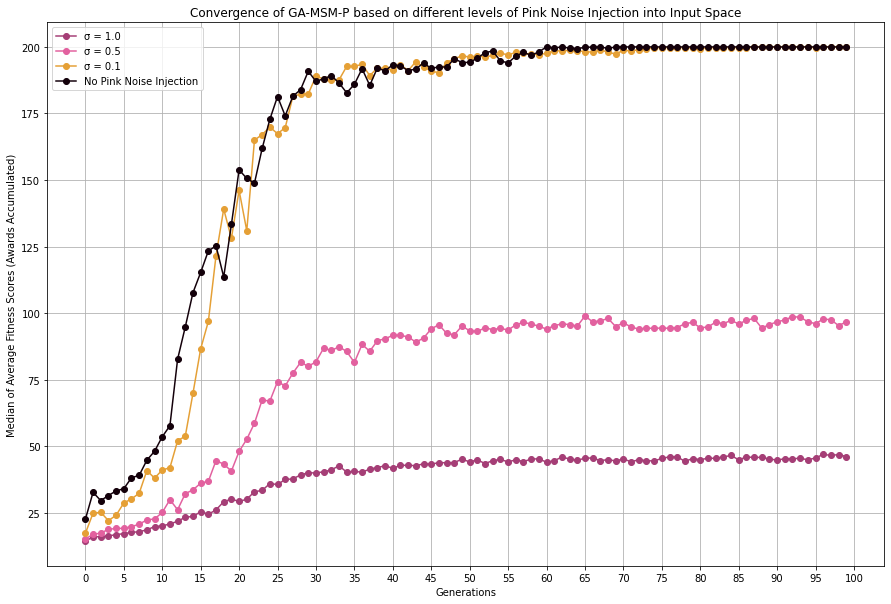

In [22]:
graphResults.display_four_results(100, 'Generations', 'Median of Average Fitness Scores (Awards Accumulated)', 'Convergence of GA-MSM-P based on different levels of Pink Noise Injection into Input Space', final_data1, final_data2, final_data3, final_data4, "o")

In [21]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Generation", "No Pink Injection", "scale = 0.1", "scale = 0.5", "scale = 1.0"]
for i in range(100):
    row = [
        i + 1, 
        f"{final_data4[i]:.2f}", 
        f"{final_data3[i]:.2f}", 
        f"{final_data2[i]:.2f}", 
        f"{final_data1[i]:.2f}"
    ]
    table.add_row(row)
print(table)

+------------+-------------------+-------------+-------------+-------------+
| Generation | No Pink Injection | scale = 0.1 | scale = 0.5 | scale = 1.0 |
+------------+-------------------+-------------+-------------+-------------+
|     1      |       22.55       |    17.29    |    15.21    |    14.37    |
|     2      |       32.69       |    24.84    |    16.85    |    15.93    |
|     3      |       29.59       |    25.18    |    17.38    |    16.04    |
|     4      |       31.49       |    22.06    |    18.78    |    16.33    |
|     5      |       33.23       |    24.07    |    19.12    |    16.77    |
|     6      |       34.04       |    28.68    |    19.14    |    17.18    |
|     7      |       38.16       |    30.21    |    19.81    |    17.65    |
|     8      |       39.07       |    32.32    |    20.71    |    17.88    |
|     9      |       44.76       |    40.85    |    22.34    |    18.60    |
|     10     |       48.10       |    38.03    |    22.68    |    19.80    |

/home/hcyam5/.local/lib/python3.7/site-packages/gymnasium/envs/registration.py:524: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  f"The environment {env_name} is out of date. You should consider "
/home/hcyam5/.local/lib/python3.7/site-packages/gymnasium/envs/registration.py:524: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  f"The environment {env_name} is out of date. You should consider "
/home/hcyam5/.local/lib/python3.7/site-packages/gymnasium/envs/registration.py:524: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  f"The environment {env_name} is out of date. You should consider "
/home/hcyam5/.local/lib/python3.7/site-packages/gymnasium/envs/registration.py:524: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to ver